# DETE & TAFE Employee Exit Surveys Cleaning and Analysis

The goal of this project is to clean and analyze exit survey responses from employees of the Department of Education, Training, and Employment (DETE) and the Technical and Further Education (TAFE) institute, both based in Queensland, Australia. I aim to answer the following question: how do the career stage and age of employees correlate with their decision to resign out of dissatisfaction?

Both the DETE and TAFE datasets differed in questions and answers, so significant data cleaning measures must be undergone first before I can combine the datasets and proceed with analysis. I ultimately found that although high absolute counts of early-stage employees resign out of dissatisfaction, there is more stable evidence for high percentages of advanced and veteran employees in their 50s who resign for this reason. The results from my analysis may be used by the government and management alike to consider better methods of employee retention and minimize resignation, such as with targeted programs for employees in the at-risk brackets.

## Data Cleaning

This section involves cleaning the data in the following ways:
   - Changing 'Not Stated' values to 'NaN' from the DETE dataset
   - Dropping irrelevant columns from both datasets
   - Standardizing both datasets' column names
   - Verifying year and age data in both datasets
   - Calculating years of service for the DETE dataset
   - Marking out dissatisfied employees from both datasets
   - Combining both datasets with `concat()`
   - Filtering employees into brackets by career stage and age


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = "whitegrid")

dete = pd.read_csv('dete_survey.csv')
tafe = pd.read_csv('tafe_survey.csv')

dete.info()
print('\n')
dete.isnull().sum() # counts how many null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [2]:
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe.info()
print('\n')
tafe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [4]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


I begin by describing the two datasets, paying particular attention to any null values. The DETE dataset contains 822 rows of data across 56 columns, many of which have significant counts of null data (which may also be represented as 'Not Stated', like in row 2). Additionally, the TAFE dataset contains 702 rows of data across 72 columns. It also contains many null values in various columns.

Both datasets have columns containing similar information but that are named differently (ex. 'ID' from DETE and 'Record ID' from TAFE), and both include many columns that are irrelevant to answering my project question. For example, columns with index 28 to 48 in the DETE dataset address employee qualities not needed for analysis, while columns with index 17 to 65 in the TAFE dataset are specific survey questions irrelevant to employees' motivation behind leaving. As such, I can drop these columns.

#### Reading NaN values and Dropping Columns

After examining the datasets, I replace all 'Not Stated' values in the DETE dataset with 'NaN'. I then drop all the irrelevant columns listed above.

In [5]:
dete = pd.read_csv('dete_survey.csv', na_values = 'Not Stated') # read 'Not Stated' values as 'NaN'

dete_updated = dete.drop(dete.columns[28:49], axis = 1)
tafe_updated = tafe.drop(tafe.columns[17:66], axis = 1)

#### Standardizing DETE and TAFE Column Names

Using various string vectorization methods, I can standardize DETE column names and map relevant/corresponding TAFE column names to be the same as the standardized DETE columns.

In [6]:
dete_updated.columns = dete_updated.columns.str.replace(' ', '_').str.lower().str.strip()
dete_updated.columns


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [7]:
mapper = {'Record ID': 'id', 
          'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separationtype',
          'Gender. What is your Gender?': 'gender', 
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_updated = tafe_updated.rename(mapper, axis = 1)
tafe_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

#### Filtering By Separation Type

To decide how I will narrow the scope of my project by focusing on a separation type, I visualize the most common separation types for DETE and TAFE employees.


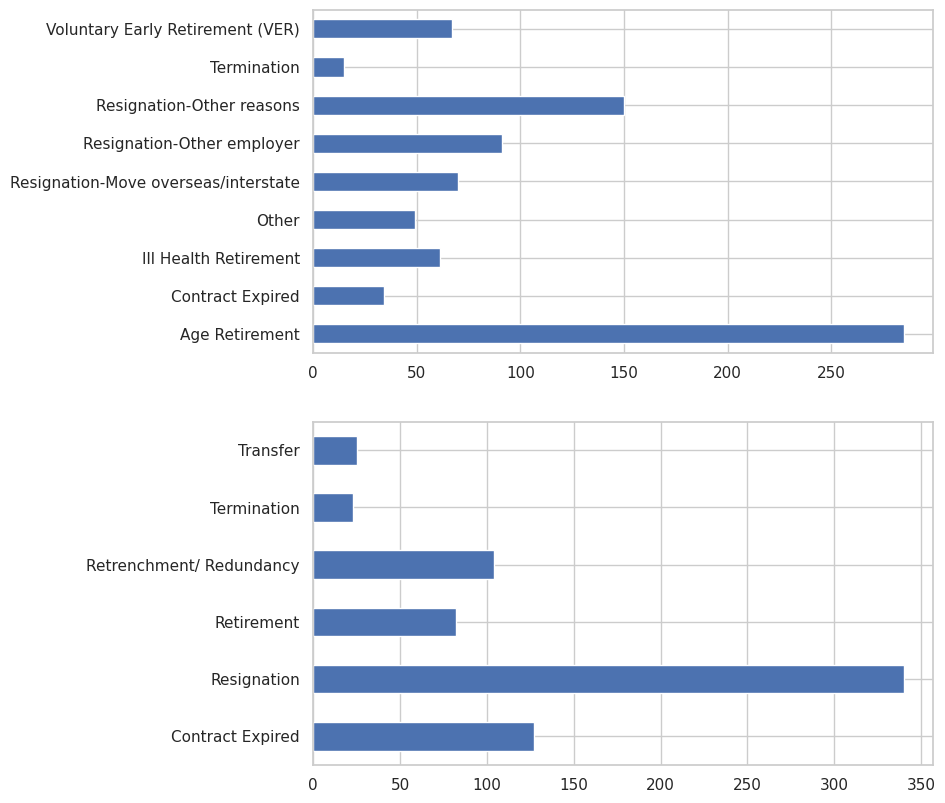

In [8]:
dete_separations = dete_updated.groupby('separationtype')['separationtype']
dete_separationscount = dete_separations.count()
tafe_separations = tafe_updated.groupby('separationtype')['separationtype']
tafe_separationscount = tafe_separations.count()

plt.figure(figsize = (8, 10))

plt.subplot(2, 1, 1)
ax1 = dete_separationscount.plot(kind = 'barh')
ax1.set_ylabel('')

plt.subplot(2, 1, 2)
ax2 = tafe_separationscount.plot(kind = 'barh')
ax2.set_ylabel('')

plt.show()

In the DETE dataset, all forms of resignation types combined are the leading cause of separation, followed closely by retirement. The most common reason for separation in the TAFE dataset is also employee resignation. As there is not nearly as much data analysis that can be done behind why employees retire, especially as compared to analyzing why employees resign, I filter the datasets to only include rows where the separation reason was resignation.

In [9]:
dete_updated['separationtype'] = dete_updated['separationtype'].str.split('-').str[0] # convert all three resignation types to just 'Resignation'
dete_resignations = dete_updated[dete_updated['separationtype'] == 'Resignation'].copy()

dete_resignations['separationtype'].value_counts() # 311, matches the count in the visualization

Resignation    311
Name: separationtype, dtype: int64

In [10]:
tafe_resignations = tafe_updated[tafe_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations['separationtype'].value_counts() # 340, matches the count in the visualization

Resignation    340
Name: separationtype, dtype: int64

#### Data Vertification

I need to verify that the data I am working with is consistent and reasonable. There are two numerical-based columns of interest to answering my two project questions: the years (`cease_date` for both datasets and `dete_start_date` for just the DETE dataset) and age (`age` for both) columns.

Both of these columns require cleaning. To begin, the `'cease_date'` column includes years in both the YYYY and MM/YYYY format, so I will keep just the year for simplicity. The `'dete_start_date'` column values are all reasonable and formatted, but since they are floats, I will also need to convert the `'cease_date'` column to floats for consistency. The TAFE dataset's year values appear consistent and do not require any changes.

In [11]:
dete_resignations['cease_date'].value_counts()


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

In [12]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float')

dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [13]:
dete_resignations['dete_start_date'].value_counts().sort_index()


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [14]:
tafe_resignations['cease_date'].value_counts().sort_index()


2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

With the years column cleaned, I now turn my attention to the `age` column. In both datasets, the age is split into 5-year brackets, which makes working with them harder. However, as I do not require extremely precise data, approximating the column as the lower number in the bracket and then converting it to a float will suffice.

In [15]:
dete_resignations['age'].value_counts().sort_index()

20 or younger     1
21-25            29
26-30            35
31-35            29
36-40            41
41-45            48
46-50            42
51-55            32
56-60            26
61 or older      23
Name: age, dtype: int64

In [16]:
dete_resignations['age'] = dete_resignations['age'].str.split('-').str[0].str.replace(' or younger', '').str.replace(' or older', '').astype(float)
dete_resignations['age'].value_counts()

41.0    48
46.0    42
36.0    41
26.0    35
51.0    32
21.0    29
31.0    29
56.0    26
61.0    23
20.0     1
Name: age, dtype: int64

In [17]:
tafe_resignations['age'].value_counts().sort_index()

20 or younger     9
21  25           33
26  30           32
31  35           32
36  40           32
41  45           45
46  50           39
51-55            39
56 or older      29
Name: age, dtype: int64

In [18]:
tafe_resignations['age'] = tafe_resignations['age'].str.split('  ').str[0].str.replace(' or younger', '').str.replace(' or older', '').str.replace('-55', '').astype(float)
tafe_resignations['age'].value_counts()

41.0    45
51.0    39
46.0    39
21.0    33
26.0    32
31.0    32
36.0    32
56.0    29
20.0     9
Name: age, dtype: int64

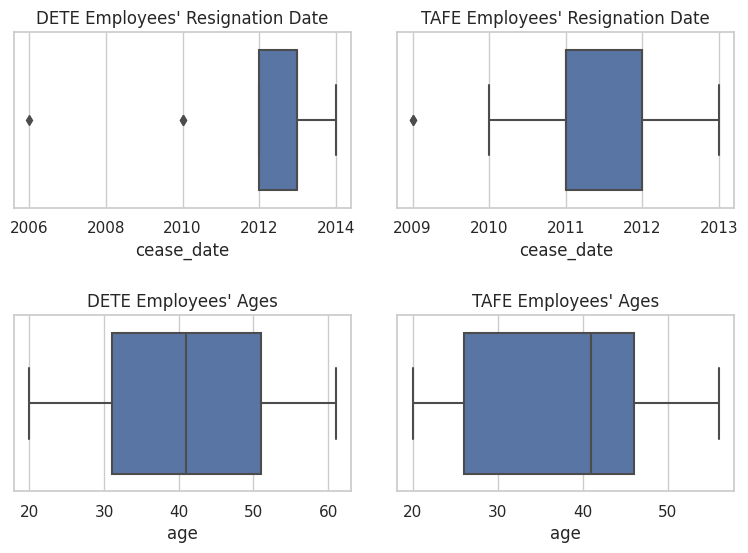

In [19]:
plt.figure(figsize = (8, 6))

plt.subplot(2, 2, 1)
sns.boxplot(data = dete_resignations, x = 'cease_date')
plt.title("DETE Employees' Resignation Date")

plt.subplot(2, 2, 2)
sns.boxplot(data = tafe_resignations, x = 'cease_date')
plt.title("TAFE Employees' Resignation Date")

plt.subplot(2, 2, 3)
sns.boxplot(data = dete_resignations, x = 'age')
plt.title("DETE Employees' Ages")

plt.subplot(2, 2, 4)
sns.boxplot(data = tafe_resignations, x = 'age')
plt.title("TAFE Employees' Ages")

plt.tight_layout(pad = 2)

plt.show()


Aside from one or two outliers in the `cease_date` columns of both datasets, the data appears to be relatively uniform and consistent. The years of the outliers are also reasonable and within the dataset's recorded boundaries, so I will keep them; no additional cleaning for either column is required.


#### Years of Service Column for DETE Dataset 

As part of the goal of this project is to determine how the career stage of an employee correlates with their decision to resign out of dissatisfaction, it is important to calculate how long, or how many years of service, an employee has been with DETE. The TAFE dataset already includes a `institute_service` column displaying exactly that, so I will add one to the DETE dataset as well by subtracting their first year of employment from their resignation year.

In [20]:
dete_resignations.loc[:, 'institute_service'] = dete_resignations.loc[:, 'cease_date'] - dete_resignations.loc[:, 'dete_start_date']
dete_resignations['institute_service']

dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

#### Filtering Dissatisfied Employes

An immediate visualization for the DETE dataset reveals that the most common reason for leaving is actually none of the choices listed in the survey. However, many of the following reasons such as "Work life balance", "Job dissatisfaction", "Workload", and "Dissatisfaction with the department" can all be stemmed from dissatisfaction with the job. As such, such columns can be considered a factor contributing to an employee's decision to leave. A similar examination of the TAFE dataset leads me to conclude that columns such as `Contributing Factors. Dissatisfaction` and `Contributing Factors. Job Dissatisfaction` are clear factors.

With this information, I can filter for whether *any* of these factors was true in an employee's decision to resign; if yes, then dissatisfaction can be considered a contributing factor.

Text(0, 0.5, '')

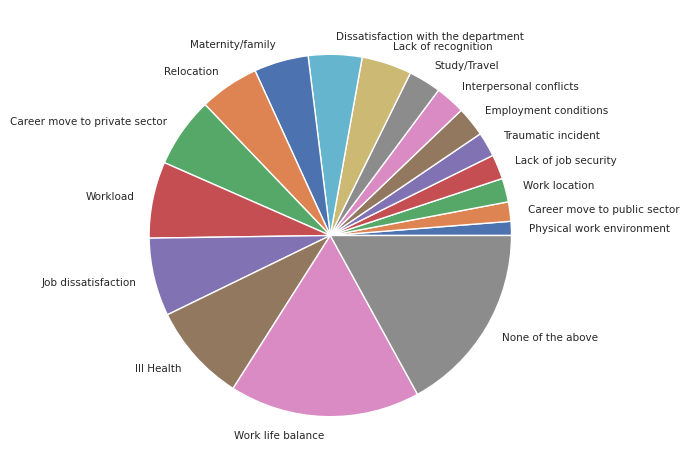

In [21]:
plt.figure(figsize = (6, 6))

dete_resignation_reasons = dete.iloc[:, 10:34].sum().sort_values()
ax = dete_resignation_reasons.plot(kind = 'pie', textprops={'fontsize': 7.5})
ax.set_ylabel('')

In [22]:
# function converts each column of a dissatisfaction factor into a boolean 
def filtering(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
    
dete_resignations.applymap(filtering)

# if any of the dissatisfaction factor columns are "True", then dissatisfaction can be considered a reason for resigning
dete_resignations.loc[:, 'dissatisfied'] = dete_resignations.loc[:, ['job_dissatisfaction', 'dissatisfaction_with_the_department',
                                                       'physical_work_environment', 'lack_of_recognition',
                                                       'lack_of_job_security', 'employment_conditions',
                                                       'work_life_balance', 'workload']].any(1, skipna = False).copy()

In [23]:
tafe_resignations.loc[:, 'dissatisfied'] = tafe_resignations.loc[:, ['Contributing Factors. Dissatisfaction',
                                                                     'Contributing Factors. Job Dissatisfaction']].applymap(filtering).any(1, skipna = False).copy()

#### Combining Data

I can now combine the two datasets and drop any columns with less than 500 non-null values. As I am looking to "stack" the two datasets on top of each other given their standardized columns, using the `concat()` function makes the most sense.

In [24]:
# clearly indicate which dataset each original row came from
dete_resignations.loc[:, 'institute'] = 'DETE' 
tafe_resignations.loc[:, 'institute'] = 'TAFE'

combined = pd.concat([dete_resignations, tafe_resignations], ignore_index = True)
combined_new = combined.dropna(thresh = 500, axis = 1).copy()

combined_new.notnull().sum()


id                   651
separationtype       651
cease_date           635
position             598
employment_status    597
gender               592
age                  596
institute_service    563
dissatisfied         643
institute            651
dtype: int64

#### The Years of Service Column

The years of service column currently contains brackets of years mixed with year counts. To clean this column, I will divide years into categories based on career stage:
   - New: < 3 years of service
   - Intermediate: 3–6 years of service
   - Advanced: 7–10 years of servie
   - Veteran: >= 11 years of service

In [25]:
combined_new['institute_service'].value_counts()


Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


In [26]:
pattern = r'(\d+)'

combined_new['institute_service'] = combined_new['institute_service'].astype(str).str.extract(pattern).astype(float)
combined_new['institute_service'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [27]:
def career_stage(year):
    if pd.isnull(year):
        return np.nan
    else:
        if year < 3:
            return '1: New'
        elif year <= 6:
            return '2: Intermediate'
        elif year <= 10:
            return '3: Advanced'
        else:
            return '4: Veteran'

combined_new.loc[:, 'career_stage'] = combined_new.loc[:, 'institute_service'].apply(career_stage) 
combined_new['dissatisfied'] = combined_new['dissatisfied'].fillna(False)


## Data Analysis

With all the data cleaned, I can now look to answering my project question: whether an employee's career stage or age group impacted their satisfaction and ultimate decision to resign. The first graph shows the percentage of employees in each career stage that resigned citing dissatisfaction.

In [28]:
combined_new['dissatisfied'].value_counts()


False    419
True     232
Name: dissatisfied, dtype: int64

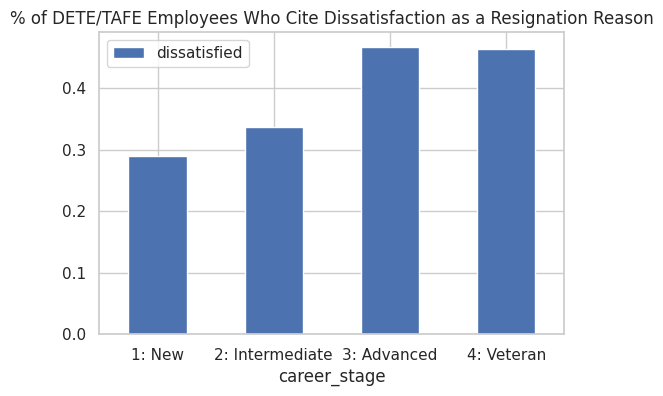

In [29]:
percentage = combined_new.pivot_table(values = 'dissatisfied', index = 'career_stage')
percentage.plot(kind = 'bar', rot = 0)
plt.title('% of DETE/TAFE Employees Who Cite Dissatisfaction as a Resignation Reason')
plt.show()


New and intermediate employees appear to be much less likely to cite dissatisfaction as a reason for resigning than employees in the advanced and veteran career stages, but further data will be needed to support this hypothesis.

I can then aggregate the employees by the career stage and count how many employees in each stage resigned citing dissatisfaction.

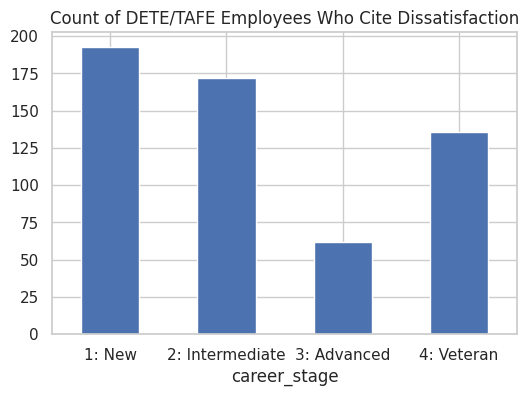

In [30]:
count = combined_new.groupby('career_stage')['id'].count()
count.plot(kind = 'bar', rot = 0)
plt.title('Count of DETE/TAFE Employees Who Cite Dissatisfaction')
plt.show()


It seems that even though there is a significantly higher proportion of advanced and intermediate employees citing dissatisfaction in resignation, the absolute number of new and intermediate employees leaving with the same reason is actually higher. I can hypothesize that this is simply due to newer employees having difficulty finding a company that suits them well, but, again, more data will be needed for a firm conclusion.

These results may provide insights into resignation due to dissatisfaction by career stage, but how does that compare to the ages of those who resign? In other words, are the ages of employees who resign correlated with dissatisfaction as a reason?

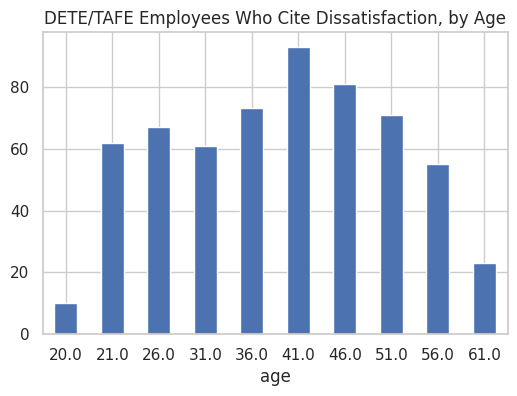

In [31]:
ages = combined_new.groupby('age')['id'].count()
ages.plot(kind = 'bar', rot = 0)
plt.title('DETE/TAFE Employees Who Cite Dissatisfaction, by Age')
plt.show()


Interestingly, the number of employees citing dissatisfaction as a resignation reason peaks with those in their 40s before dropping off. However, this may not tell the whole story as it does not recognize the proportion of employees in each age group who resign out of dissatisfaction.

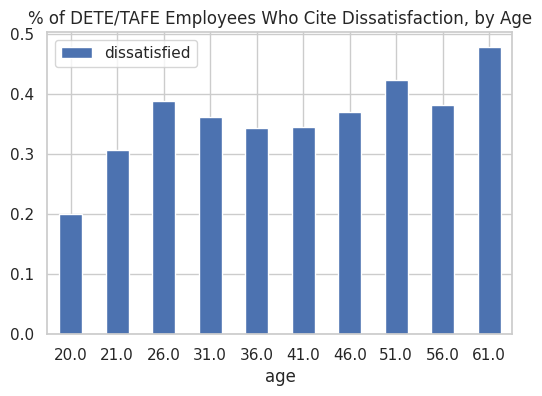

In [32]:
ages_percentage = combined_new.pivot_table(values = 'dissatisfied', index = 'age', aggfunc = 'mean')
ages_percentage.plot(kind = 'bar', rot = 0)
plt.title('% of DETE/TAFE Employees Who Cite Dissatisfaction, by Age')
plt.show()

The percentage of employees resigning due to dissatisfaction tends to increase by age group and clearly peaks with employees 61 years old or older. This corroborates previous data that the percentage of advanced and veteran employees who resign by dissatisfaction is notably higher than employees in other career stages, as those later in their careers would, logically, tend to be older in age.

## Conclusion

I found that the percentage of advanced and veteran employees—defined as those with 7–10 or 11+ years of service, respectively—who resign from a DETE/TAFE role due to dissatisfaction is greatly higher than those in earlier career stages. This is supported by the data from the percentage of employees who resign out of dissatisfaction by age group: the proportion steadily increases from the 30s onwards before peaking for employees aged 61 or more.

With this data, it may be worthwhile for DETE and TAFE management to enact extra, targeted measures for individuals in the later age ranges and career stages to ensure employee happiness and minimize resignations.